In [63]:
!pip install opencv-python-headless

In [64]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import array
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
import os

root='/content/gdrive/MyDrive/Colab Notebooks/Handwritten Signature Data/gray_scale'

for i in range(0,16):
  os.mkdir(os.path.join(root, f'signature_{i+1}'))

In [ ]:
# for renaming the folders and images

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Handwritten Signature Data/data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))  

In [ ]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
from google.colab.patches import cv2_imshow 

directory = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

In [4]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline('C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale')  # gray image source path

In [ ]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [ ]:
p.sample(1600)

In [ ]:
# To rename Augmented Data

data_dir = 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

In [6]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import splitfolders
input_folder = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output"
splitfolders.ratio (input_folder, output="C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\splitted_gray_data_80_20",
                seed=42, ratio=(.8,.2),
                group_prefix=None)

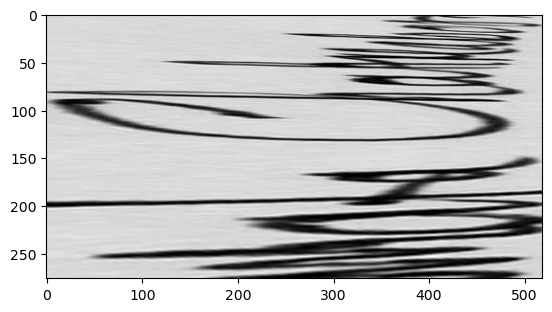

In [4]:
img = image.load_img('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//train//subject_1//signature_11.jpg')
plt.imshow(img)
# print(img.shape)

In [5]:
print(cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//train//subject_1//signature_11.jpg').shape)
cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//train//subject_1//signature_11.jpg')

(276, 519, 3)


array([[[223, 223, 223],
        [222, 222, 222],
        [222, 222, 222],
        ...,
        [ 87,  87,  87],
        [ 76,  76,  76],
        [ 67,  67,  67]],

       [[218, 218, 218],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [212, 212, 212],
        [210, 210, 210]],

       [[218, 218, 218],
        [218, 218, 218],
        [217, 217, 217],
        ...,
        [222, 222, 222],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[212, 212, 212],
        [213, 213, 213],
        [213, 213, 213],
        ...,
        [215, 215, 215],
        [216, 216, 216],
        [216, 216, 216]],

       [[215, 215, 215],
        [215, 215, 215],
        [216, 216, 216],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [220, 220, 220],
        [221, 221, 221],
        [221, 221, 221]]

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [66]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)



In [67]:
train_generator=train_datagen.flow_from_directory('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1273 images belonging to 16 classes.
Found 327 images belonging to 16 classes.


In [68]:
num_samples = len(train_generator)
x_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)


## 25 Epoch

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/25
40/40 [==============================] - 117s 2s/step - loss: 2.8017 - accuracy: 0.0613 - val_loss: 2.7707 - val_accuracy: 0.0703
Epoch 2/25
40/40 [==============================] - 52s 1s/step - loss: 2.7694 - accuracy: 0.0841 - val_loss: 2.7668 - val_accuracy: 0.0673
Epoch 3/25
40/40 [==============================] - 51s 1s/step - loss: 2.7671 - accuracy: 0.0668 - val_loss: 2.7611 - val_accuracy: 0.0856
Epoch 4/25
40/40 [==============================] - 52s 1s/step - loss: 2.7639 - accuracy: 0.0801 - val_loss: 2.7652 - val_accuracy: 0.0673
Epoch 5/25
40/40 [==============================] - 55s 1s/step - loss: 2.7642 - accuracy: 0.0746 - val_loss: 2.7740 - val_accuracy: 0.0673
Epoch 6/25
40/40 [==============================] - 54s 1s/step - loss: 2.7581 - accuracy: 0.0817 - val_loss: 2.7592 - val_accuracy: 0.0734
Epoch 7/25
40/40 [==============================] - 55s 1s/step - loss: 2.7562 - accuracy: 0.0848 - val_loss: 2.7565 - val_accuracy: 0.0826
Epoch 8/25
40/40 [=

In [70]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 8s 500ms/step - loss: 2.4689 - accuracy: 0.1254
Test Loss: 2.468855619430542
Test Accuracy: 0.12538225948810577
11/11 [==============================] - 177s 720ms/step


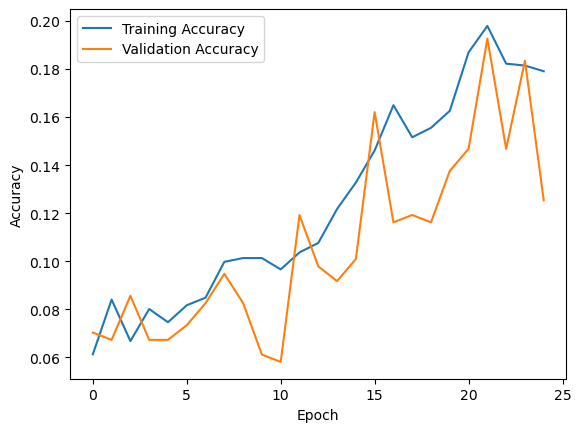

In [71]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

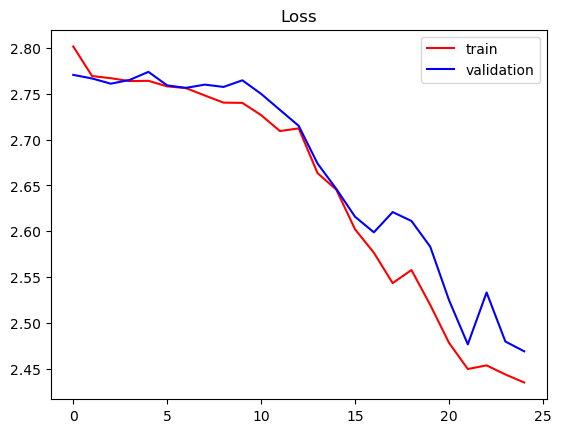

In [72]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [73]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 10s 676ms/step
Confusion Matrix:
[[ 0  1  2  5  0  1  0  2  1  0  1  3  0  0  0  0]
 [ 0  4  2 11  0  1  0  0  2  0  2  1  0  0  0  0]
 [ 0  1  4  4  1  1  1  2  2  0  4  2  0  0  0  1]
 [ 0  0  0 15  0  1  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  3  1  0  0  2  1  9  0  0  0  0  0  0  0]
 [ 0  0  2 13  0  0  0  3  1  0  0  0  0  0  0  0]
 [ 0  0  3  0  1  0  0  0 15  0  1  0  0  0  0  3]
 [ 0  0  0 17  0  0  0  3  1  0  1  0  0  0  0  0]
 [ 0  0  3  0  0  0  4  0 12  0  1  0  0  0  0  0]
 [ 0  2  2  5  0  0  1  2  1  0  3  2  0  0  0  1]
 [ 0  3  5  5  0  2  0  2  2  0  1  1  0  0  0  0]
 [ 0  2  3 12  0  1  0  2  1  0  2  2  0  0  0  0]
 [ 0  0  5  3  1  0  1  1  6  0  2  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  8  3  0  0  0  3  1  0  3  2  0  0  0  1]
 [ 0  0  5  4  0  1  0  1  5  0  3  2  0  0  0  0]]


11/11 [==============================] - 12s 757ms/step


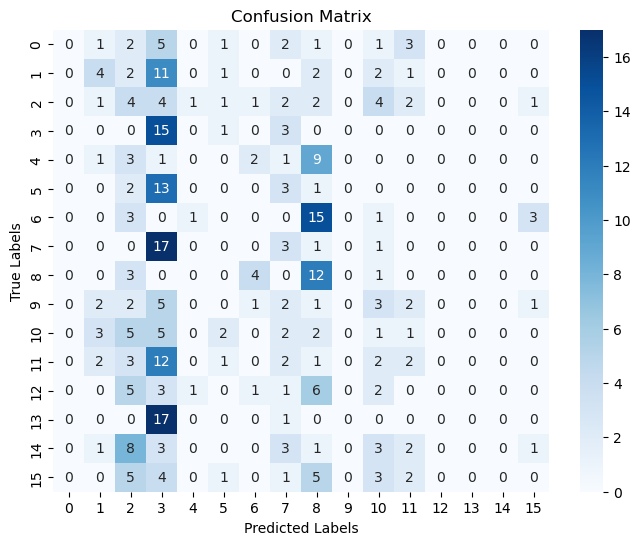

In [74]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [75]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.1739, FPR = 0.0362, TNR = 0.9638, FNR = 0.8261
Class 2: TPR = 0.1739, FPR = 0.1414, TNR = 0.8586, FNR = 0.8261
Class 3: TPR = 0.7895, FPR = 0.3247, TNR = 0.6753, FNR = 0.2105
Class 4: TPR = 0.0000, FPR = 0.0097, TNR = 0.9903, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0260, TNR = 0.9740, FNR = 1.0000
Class 6: TPR = 0.0000, FPR = 0.0296, TNR = 0.9704, FNR = 1.0000
Class 7: TPR = 0.1364, FPR = 0.0754, TNR = 0.9246, FNR = 0.8636
Class 8: TPR = 0.6000, FPR = 0.1531, TNR = 0.8469, FNR = 0.4000
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0476, FPR = 0.0752, TNR = 0.9248, FNR = 0.9524
Class 11: TPR = 0.0800, FPR = 0.0430, TNR = 0.9570, FNR = 0.9200
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.019

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


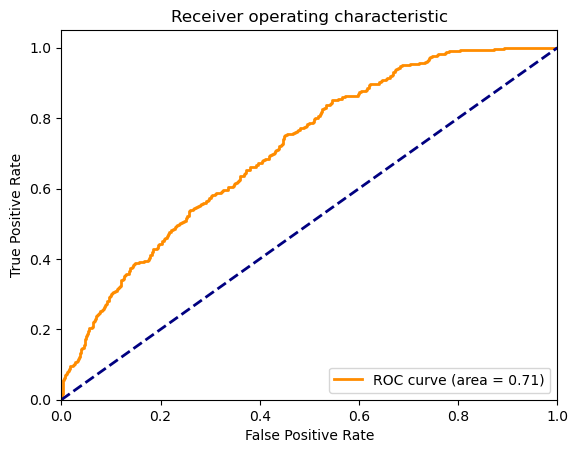

In [76]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 15s 998ms/step - loss: 2.4689 - accuracy: 0.1254
Test Loss: 2.468855619430542
Test Accuracy: 0.12538225948810577
11/11 [==============================] - 13s 907ms/step
AUC for class 0: 0.5418
AUC for class 1: 0.7052
AUC for class 2: 0.5581
AUC for class 3: 0.8997
AUC for class 4: 0.7717
AUC for class 5: 0.7109
AUC for class 6: 0.8468
AUC for class 7: 0.8066
AUC for class 8: 0.8992
AUC for class 9: 0.5600
AUC for class 10: 0.5710
AUC for class 11: 0.6232
AUC for class 12: 0.6977
AUC for class 13: 0.8677
AUC for class 14: 0.5307
AUC for class 15: 0.6374


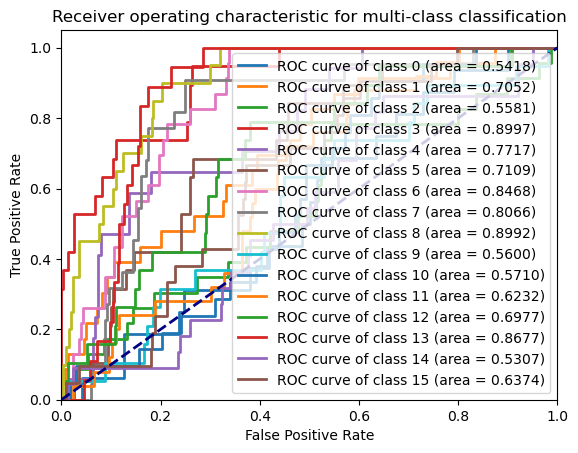

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 30 Epoch

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/30
40/40 [==============================] - 221s 3s/step - loss: 2.8113 - accuracy: 0.0644 - val_loss: 2.7779 - val_accuracy: 0.0765
Epoch 2/30
40/40 [==============================] - 106s 3s/step - loss: 2.7734 - accuracy: 0.0793 - val_loss: 2.7686 - val_accuracy: 0.0703
Epoch 3/30
40/40 [==============================] - 105s 3s/step - loss: 2.7651 - accuracy: 0.0738 - val_loss: 2.7557 - val_accuracy: 0.0673
Epoch 4/30
40/40 [==============================] - 100s 3s/step - loss: 2.7549 - accuracy: 0.0801 - val_loss: 2.7508 - val_accuracy: 0.0826
Epoch 5/30
40/40 [==============================] - 104s 3s/step - loss: 2.7478 - accuracy: 0.0880 - val_loss: 2.7928 - val_accuracy: 0.0612
Epoch 6/30
40/40 [==============================] - 99s 2s/step - loss: 2.7415 - accuracy: 0.1021 - val_loss: 2.7434 - val_accuracy: 0.0826
Epoch 7/30
40/40 [==============================] - 100s 3s/step - loss: 2.7400 - accuracy: 0.0943 - val_loss: 2.7685 - val_accuracy: 0.0703
Epoch 8/30
40/

In [79]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 10s 597ms/step - loss: 2.6804 - accuracy: 0.1009
Test Loss: 2.680408239364624
Test Accuracy: 0.10091742873191833
11/11 [==============================] - 37s 632ms/step


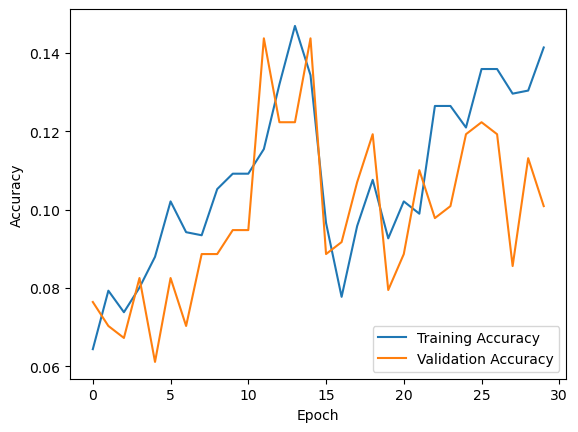

In [80]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

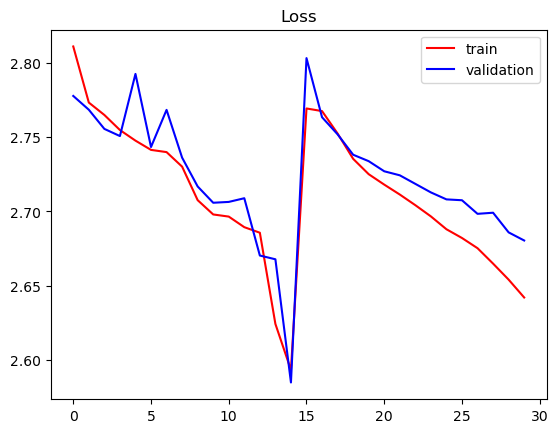

In [81]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [82]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 10s 686ms/step
Confusion Matrix:
[[ 0  6  0  0  0  0  5  0  0  0  0  3  0  0  0  2]
 [ 0 13  0  0  0  0  4  0  0  0  3  3  0  0  0  0]
 [ 0  5  2  0  0  0  9  0  0  0  1  6  0  0  0  0]
 [ 0 15  1  0  0  0  0  0  0  0  0  1  0  0  0  2]
 [ 0  1  1  0  0  0 12  0  0  0  1  0  0  0  0  2]
 [ 0 11  0  0  0  0  3  1  0  0  0  4  0  0  0  0]
 [ 0  2  0  0  0  0 12  0  0  0  1  7  0  0  0  1]
 [ 0 15  0  0  0  0  3  0  0  0  0  2  0  0  0  2]
 [ 0  1  0  0  0  0 16  0  0  0  3  0  0  0  0  0]
 [ 0  9  0  0  0  0  6  0  0  0  2  1  0  0  0  1]
 [ 0  7  0  0  0  0  4  0  0  0  0  5  0  0  0  5]
 [ 0 12  3  0  0  0  3  0  0  0  1  6  0  0  0  0]
 [ 0  3  0  0  0  0 10  0  0  0  2  3  0  0  0  1]
 [ 0 16  0  0  0  0  0  0  0  0  0  1  0  0  0  1]
 [ 0  7  1  0  0  0  7  0  0  0  1  3  0  0  0  3]
 [ 0  4  0  0  0  0  6  0  0  0  2  9  0  0  0  0]]


11/11 [==============================] - 10s 626ms/step


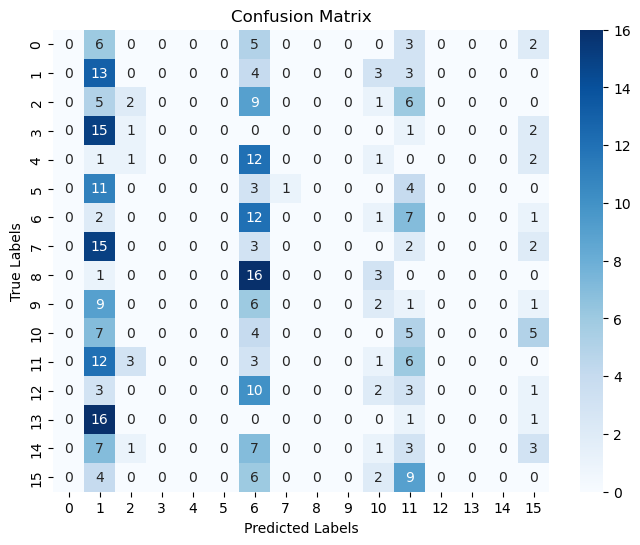

In [83]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [84]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.5652, FPR = 0.3750, TNR = 0.6250, FNR = 0.4348
Class 2: TPR = 0.0870, FPR = 0.0197, TNR = 0.9803, FNR = 0.9130
Class 3: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.5217, FPR = 0.2895, TNR = 0.7105, FNR = 0.4783
Class 7: TPR = 0.0000, FPR = 0.0033, TNR = 0.9967, FNR = 1.0000
Class 8: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0556, TNR = 0.9444, FNR = 1.0000
Class 11: TPR = 0.2400, FPR = 0.1589, TNR = 0.8411, FNR = 0.7600
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.065

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


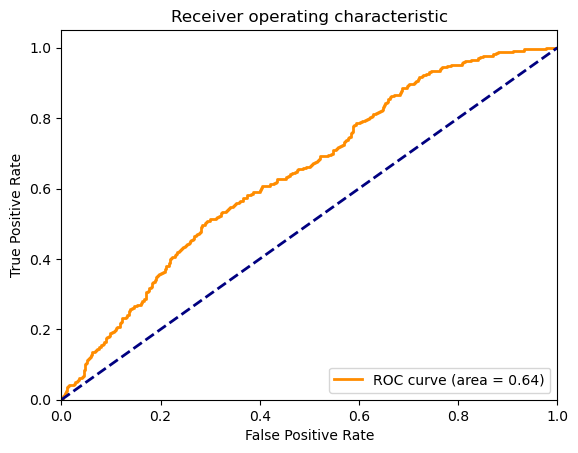

In [85]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 9s 624ms/step - loss: 2.6804 - accuracy: 0.1009
Test Loss: 2.680408239364624
Test Accuracy: 0.10091742873191833
11/11 [==============================] - 8s 602ms/step
AUC for class 0: 0.5026
AUC for class 1: 0.6417
AUC for class 2: 0.5668
AUC for class 3: 0.8486
AUC for class 4: 0.7723
AUC for class 5: 0.6082
AUC for class 6: 0.7270
AUC for class 7: 0.6973
AUC for class 8: 0.8492
AUC for class 9: 0.5654
AUC for class 10: 0.4893
AUC for class 11: 0.6107
AUC for class 12: 0.7271
AUC for class 13: 0.8333
AUC for class 14: 0.4626
AUC for class 15: 0.4725


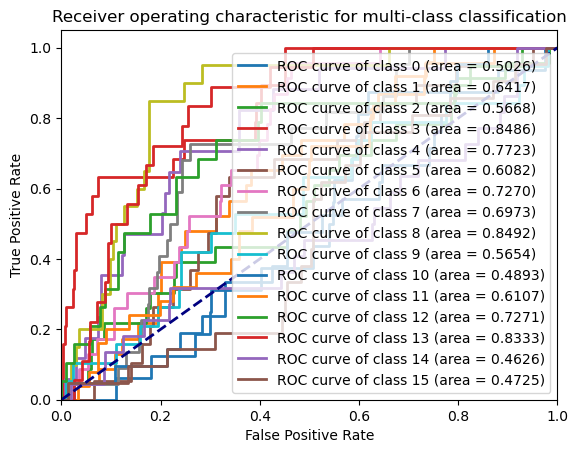

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 35 Epoch

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=35, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/35
40/40 [==============================] - 189s 3s/step - loss: 2.8037 - accuracy: 0.0660 - val_loss: 2.7644 - val_accuracy: 0.0765
Epoch 2/35
40/40 [==============================] - 82s 2s/step - loss: 2.7632 - accuracy: 0.0841 - val_loss: 2.7775 - val_accuracy: 0.0734
Epoch 3/35
40/40 [==============================] - 81s 2s/step - loss: 2.7657 - accuracy: 0.0911 - val_loss: 2.7618 - val_accuracy: 0.0795
Epoch 4/35
40/40 [==============================] - 80s 2s/step - loss: 2.7545 - accuracy: 0.0943 - val_loss: 2.7639 - val_accuracy: 0.0917
Epoch 5/35
40/40 [==============================] - 81s 2s/step - loss: 2.7438 - accuracy: 0.0951 - val_loss: 2.7603 - val_accuracy: 0.0856
Epoch 6/35
40/40 [==============================] - 80s 2s/step - loss: 2.7360 - accuracy: 0.0958 - val_loss: 2.7499 - val_accuracy: 0.0917
Epoch 7/35
40/40 [==============================] - 82s 2s/step - loss: 2.7284 - accuracy: 0.1092 - val_loss: 2.7577 - val_accuracy: 0.0673
Epoch 8/35
40/40 [=

In [88]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 6s 432ms/step - loss: 2.3933 - accuracy: 0.1743
Test Loss: 2.393345355987549
Test Accuracy: 0.17431192100048065
11/11 [==============================] - 48s 605ms/step


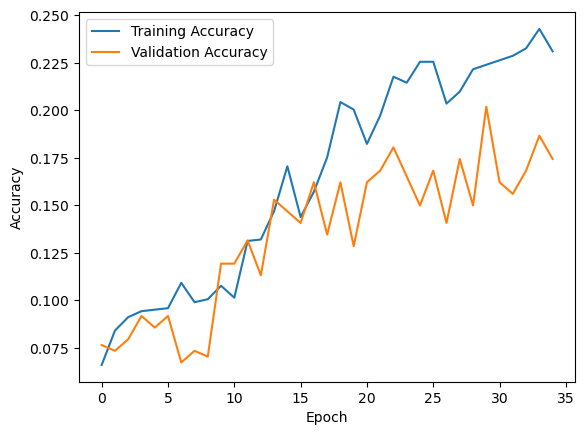

In [89]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

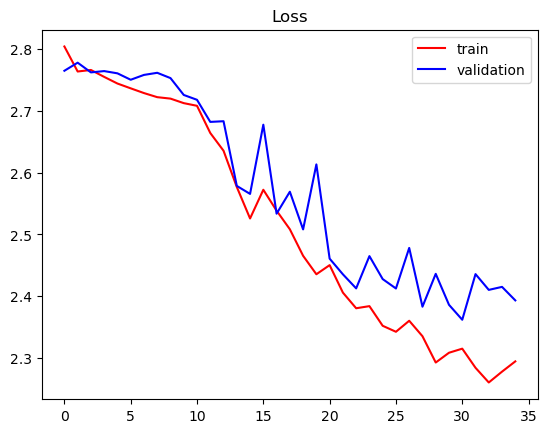

In [90]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [91]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 8s 558ms/step
Confusion Matrix:
[[ 0  1  5  0  2  0  2  0  0  0  1  2  0  0  1  2]
 [ 0  7  3  1  2  0  1  1  0  0  4  4  0  0  0  0]
 [ 0  1  5  1  7  0  2  0  0  0  4  1  0  0  0  2]
 [ 0  1  1  8  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  6  0  8  0  0  0  0  1  0  0  0  0]
 [ 0  0  7  0  1  1  0  5  0  0  3  2  0  0  0  0]
 [ 0  0  0  0  8  0 12  0  1  0  0  0  0  0  0  2]
 [ 0  2  5  5  0  0  1  5  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  3  0 15  0  2  0  0  0  0  0  0  0]
 [ 0  0  5  0  2  0  1  0  1  1  5  2  0  0  1  1]
 [ 0  1  2  1  7  0  3  0  0  1  2  1  0  0  1  2]
 [ 1  2  5  1  3  0  0  1  0  0  6  5  0  0  0  1]
 [ 0  1  2  0  6  0  6  0  1  0  1  0  0  0  1  1]
 [ 0  1  2  8  0  1  0  5  0  0  0  1  0  0  0  0]
 [ 0  1  5  0  7  0  2  0  0  0  2  0  0  0  2  3]
 [ 0  0  3  0  5  0  5  0  0  0  2  3  0  0  2  1]]


11/11 [==============================] - 8s 562ms/step


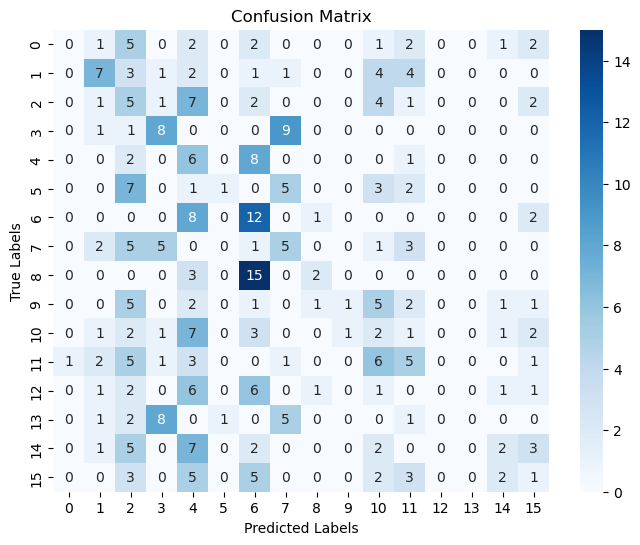

In [92]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [93]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0032, TNR = 0.9968, FNR = 1.0000
Class 1: TPR = 0.3043, FPR = 0.0362, TNR = 0.9638, FNR = 0.6957
Class 2: TPR = 0.2174, FPR = 0.1546, TNR = 0.8454, FNR = 0.7826
Class 3: TPR = 0.4211, FPR = 0.0552, TNR = 0.9448, FNR = 0.5789
Class 4: TPR = 0.3529, FPR = 0.1710, TNR = 0.8290, FNR = 0.6471
Class 5: TPR = 0.0526, FPR = 0.0032, TNR = 0.9968, FNR = 0.9474
Class 6: TPR = 0.5217, FPR = 0.1513, TNR = 0.8487, FNR = 0.4783
Class 7: TPR = 0.2273, FPR = 0.0689, TNR = 0.9311, FNR = 0.7727
Class 8: TPR = 0.1000, FPR = 0.0098, TNR = 0.9902, FNR = 0.9000
Class 9: TPR = 0.0526, FPR = 0.0032, TNR = 0.9968, FNR = 0.9474
Class 10: TPR = 0.0952, FPR = 0.0948, TNR = 0.9052, FNR = 0.9048
Class 11: TPR = 0.2000, FPR = 0.0662, TNR = 0.9338, FNR = 0.8000
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0909, FPR = 0.0197, TNR = 0.9803, FNR = 0.9091
Class 15: TPR = 0.0476, FPR = 0.045

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


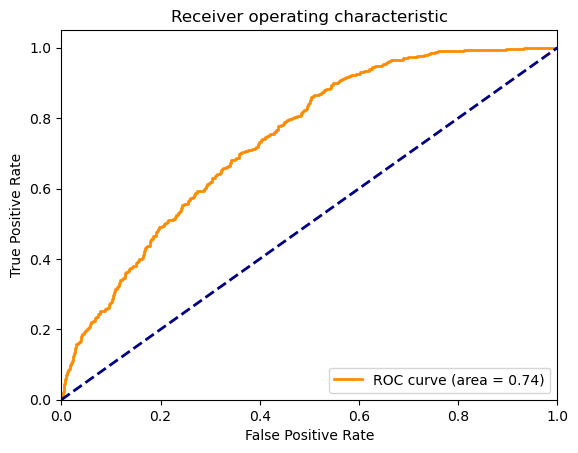

In [94]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 8s 516ms/step - loss: 2.3933 - accuracy: 0.1743
Test Loss: 2.393345355987549
Test Accuracy: 0.17431192100048065
11/11 [==============================] - 8s 566ms/step
AUC for class 0: 0.5217
AUC for class 1: 0.7663
AUC for class 2: 0.4983
AUC for class 3: 0.9436
AUC for class 4: 0.6943
AUC for class 5: 0.7189
AUC for class 6: 0.8370
AUC for class 7: 0.8049
AUC for class 8: 0.9282
AUC for class 9: 0.6724
AUC for class 10: 0.5722
AUC for class 11: 0.6530
AUC for class 12: 0.7596
AUC for class 13: 0.8821
AUC for class 14: 0.6566
AUC for class 15: 0.6911


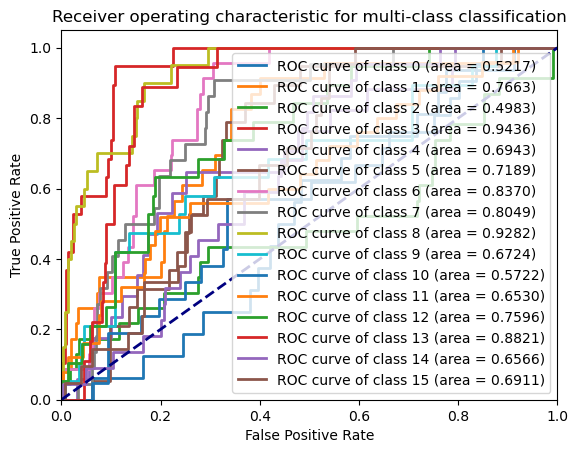

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 40 Epoch

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=40, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/40
40/40 [==============================] - 148s 2s/step - loss: 2.8038 - accuracy: 0.0746 - val_loss: 2.7704 - val_accuracy: 0.0765
Epoch 2/40
40/40 [==============================] - 69s 2s/step - loss: 2.7695 - accuracy: 0.0691 - val_loss: 2.7615 - val_accuracy: 0.0826
Epoch 3/40
40/40 [==============================] - 67s 2s/step - loss: 2.7646 - accuracy: 0.0738 - val_loss: 2.7614 - val_accuracy: 0.0887
Epoch 4/40
40/40 [==============================] - 66s 2s/step - loss: 2.7564 - accuracy: 0.0903 - val_loss: 2.7614 - val_accuracy: 0.0642
Epoch 5/40
40/40 [==============================] - 66s 2s/step - loss: 2.7494 - accuracy: 0.0982 - val_loss: 2.7541 - val_accuracy: 0.1009
Epoch 6/40
40/40 [==============================] - 67s 2s/step - loss: 2.7445 - accuracy: 0.0974 - val_loss: 2.7456 - val_accuracy: 0.0887
Epoch 7/40
40/40 [==============================] - 68s 2s/step - loss: 2.7337 - accuracy: 0.1005 - val_loss: 2.7612 - val_accuracy: 0.0795
Epoch 8/40
40/40 [=

In [97]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 6s 467ms/step - loss: 2.4162 - accuracy: 0.1804
Test Loss: 2.416177272796631
Test Accuracy: 0.1804281324148178
11/11 [==============================] - 87s 441ms/step


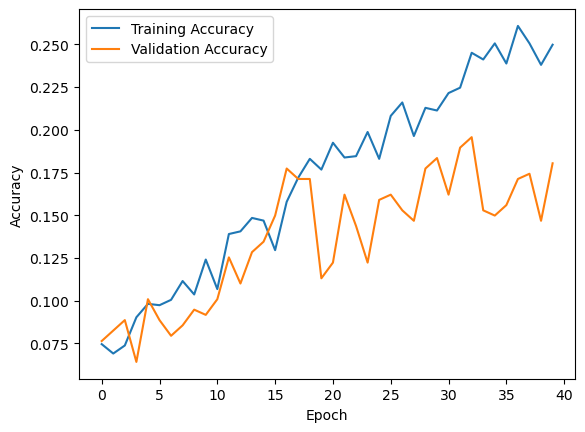

In [98]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

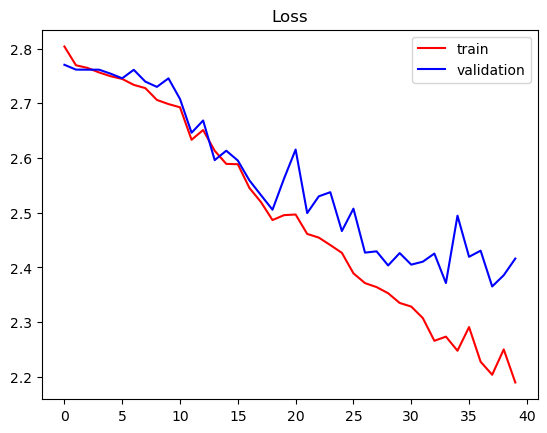

In [99]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [100]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 8s 585ms/step
Confusion Matrix:
[[ 0  1  5  3  1  1  0  1  0  0  0  1  0  0  0  3]
 [ 0  8  2  5  0  2  0  2  0  0  1  3  0  0  0  0]
 [ 0  6  5  2  0  0  1  0  1  0  1  4  0  0  0  3]
 [ 0  0  0 15  0  0  0  3  0  0  0  0  0  1  0  0]
 [ 0  2  4  0  0  1  2  0  1  0  1  0  0  1  0  5]
 [ 0  0  0  7  0  5  0  2  0  0  0  4  0  0  0  1]
 [ 0  0  1  0  0  0  9  0  1  0  1  0  1  0  0 10]
 [ 0  1  2 13  0  1  1  2  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  7  0  6  0  0  0  1  0  0  6]
 [ 1  3  5  2  0  0  1  1  0  1  2  2  0  0  0  1]
 [ 0  4  7  2  0  2  2  0  0  0  0  1  0  1  0  2]
 [ 0  6  5  3  0  0  0  3  0  0  0  5  0  0  0  3]
 [ 0  3  4  0  1  1  2  1  0  0  1  0  1  0  0  5]
 [ 0  1  1 14  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  3  5  0  0  0  1  1  0  2  1  4  0  0  0  5]
 [ 0  1  7  0  0  1  2  0  1  0  2  5  0  0  0  2]]


11/11 [==============================] - 9s 576ms/step


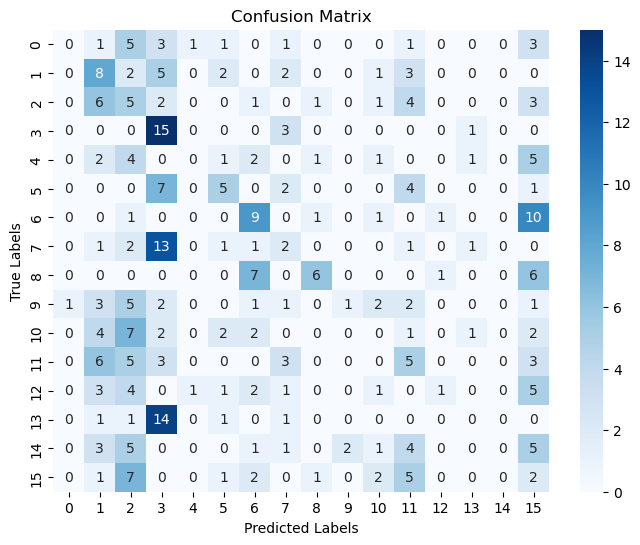

In [101]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [102]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0032, TNR = 0.9968, FNR = 1.0000
Class 1: TPR = 0.3478, FPR = 0.1020, TNR = 0.8980, FNR = 0.6522
Class 2: TPR = 0.2174, FPR = 0.1579, TNR = 0.8421, FNR = 0.7826
Class 3: TPR = 0.7895, FPR = 0.1656, TNR = 0.8344, FNR = 0.2105
Class 4: TPR = 0.0000, FPR = 0.0065, TNR = 0.9935, FNR = 1.0000
Class 5: TPR = 0.2632, FPR = 0.0325, TNR = 0.9675, FNR = 0.7368
Class 6: TPR = 0.3913, FPR = 0.0625, TNR = 0.9375, FNR = 0.6087
Class 7: TPR = 0.0909, FPR = 0.0492, TNR = 0.9508, FNR = 0.9091
Class 8: TPR = 0.3000, FPR = 0.0130, TNR = 0.9870, FNR = 0.7000
Class 9: TPR = 0.0526, FPR = 0.0065, TNR = 0.9935, FNR = 0.9474
Class 10: TPR = 0.0000, FPR = 0.0327, TNR = 0.9673, FNR = 1.0000
Class 11: TPR = 0.2000, FPR = 0.0828, TNR = 0.9172, FNR = 0.8000
Class 12: TPR = 0.0526, FPR = 0.0065, TNR = 0.9935, FNR = 0.9474
Class 13: TPR = 0.0000, FPR = 0.0129, TNR = 0.9871, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.0952, FPR = 0.143

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


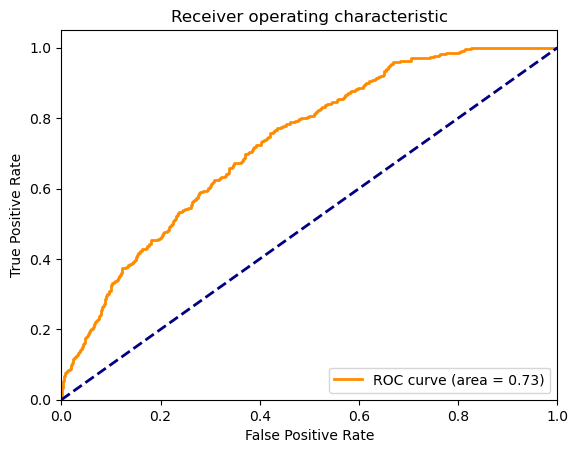

In [103]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 8s 552ms/step - loss: 2.4162 - accuracy: 0.1804
Test Loss: 2.416177272796631
Test Accuracy: 0.1804281324148178
11/11 [==============================] - 7s 507ms/step
AUC for class 0: 0.5812
AUC for class 1: 0.7679
AUC for class 2: 0.5974
AUC for class 3: 0.9164
AUC for class 4: 0.6954
AUC for class 5: 0.7613
AUC for class 6: 0.8478
AUC for class 7: 0.8001
AUC for class 8: 0.9235
AUC for class 9: 0.5817
AUC for class 10: 0.5650
AUC for class 11: 0.6205
AUC for class 12: 0.6955
AUC for class 13: 0.8803
AUC for class 14: 0.5934
AUC for class 15: 0.6564


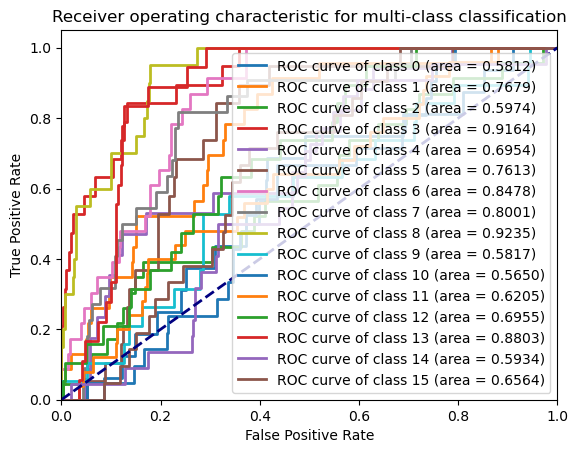

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 80 Epoch

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=80, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/80
40/40 [==============================] - 163s 2s/step - loss: 2.8166 - accuracy: 0.0581 - val_loss: 2.7679 - val_accuracy: 0.0826
Epoch 2/80
40/40 [==============================] - 69s 2s/step - loss: 2.7725 - accuracy: 0.0856 - val_loss: 2.7657 - val_accuracy: 0.0734
Epoch 3/80
40/40 [==============================] - 66s 2s/step - loss: 2.7657 - accuracy: 0.0715 - val_loss: 2.7583 - val_accuracy: 0.0826
Epoch 4/80
40/40 [==============================] - 68s 2s/step - loss: 2.7554 - accuracy: 0.0896 - val_loss: 2.7579 - val_accuracy: 0.1162
Epoch 5/80
40/40 [==============================] - 69s 2s/step - loss: 2.7511 - accuracy: 0.0919 - val_loss: 2.7488 - val_accuracy: 0.0917
Epoch 6/80
40/40 [==============================] - 67s 2s/step - loss: 2.7416 - accuracy: 0.1029 - val_loss: 2.7529 - val_accuracy: 0.0734
Epoch 7/80
40/40 [==============================] - 66s 2s/step - loss: 2.7280 - accuracy: 0.1123 - val_loss: 2.7303 - val_accuracy: 0.1009
Epoch 8/80
40/40 [=

In [106]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 4s 352ms/step - loss: 2.4857 - accuracy: 0.2018
Test Loss: 2.485705852508545
Test Accuracy: 0.20183485746383667
11/11 [==============================] - 15s 362ms/step


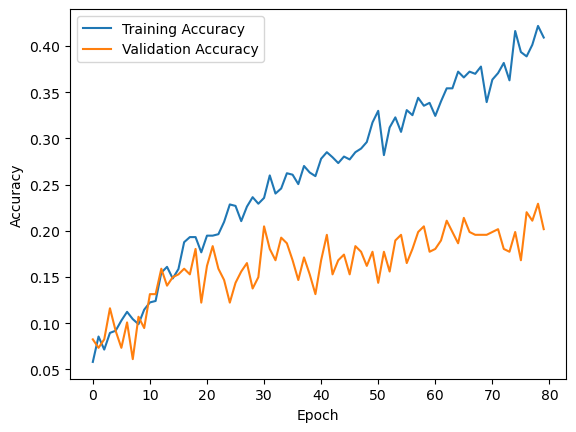

In [107]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

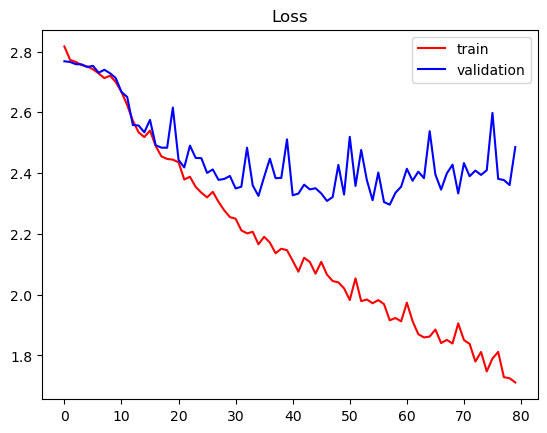

In [108]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [109]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 5s 336ms/step
Confusion Matrix:
[[0 1 8 0 3 0 0 0 1 1 0 0 0 0 1 1]
 [0 8 3 0 2 0 0 0 0 0 6 0 0 3 1 0]
 [0 2 6 0 5 0 0 0 1 0 3 2 0 1 1 2]
 [0 2 2 8 0 0 0 3 0 0 0 1 0 3 0 0]
 [0 0 3 0 7 0 2 0 2 0 1 0 1 1 0 0]
 [0 4 8 0 1 0 0 2 0 0 0 0 0 2 1 1]
 [0 0 2 0 3 0 4 0 5 0 1 2 1 0 1 4]
 [0 1 8 2 0 0 0 5 0 0 0 1 1 3 0 1]
 [0 0 1 0 4 0 3 0 7 0 3 0 0 0 0 2]
 [0 3 5 0 0 0 0 0 1 1 5 1 1 0 1 1]
 [0 2 3 0 5 0 1 1 0 1 1 1 1 2 2 1]
 [0 2 9 0 2 0 0 2 0 1 4 2 1 2 0 0]
 [0 1 3 0 4 0 0 0 2 0 0 0 6 0 0 3]
 [0 6 1 1 0 0 0 3 0 0 0 1 0 6 0 0]
 [0 1 9 0 1 0 0 0 1 0 0 3 1 0 2 4]
 [0 3 7 0 1 0 0 0 0 0 1 1 1 0 4 3]]


11/11 [==============================] - 4s 358ms/step


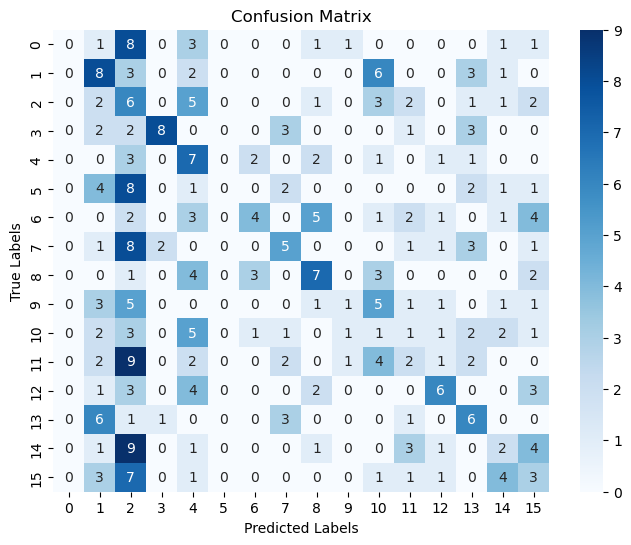

In [110]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [111]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.3478, FPR = 0.0921, TNR = 0.9079, FNR = 0.6522
Class 2: TPR = 0.2609, FPR = 0.2368, TNR = 0.7632, FNR = 0.7391
Class 3: TPR = 0.4211, FPR = 0.0097, TNR = 0.9903, FNR = 0.5789
Class 4: TPR = 0.4118, FPR = 0.1000, TNR = 0.9000, FNR = 0.5882
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.1739, FPR = 0.0197, TNR = 0.9803, FNR = 0.8261
Class 7: TPR = 0.2273, FPR = 0.0361, TNR = 0.9639, FNR = 0.7727
Class 8: TPR = 0.3500, FPR = 0.0423, TNR = 0.9577, FNR = 0.6500
Class 9: TPR = 0.0526, FPR = 0.0097, TNR = 0.9903, FNR = 0.9474
Class 10: TPR = 0.0476, FPR = 0.0784, TNR = 0.9216, FNR = 0.9524
Class 11: TPR = 0.0800, FPR = 0.0430, TNR = 0.9570, FNR = 0.9200
Class 12: TPR = 0.3158, FPR = 0.0260, TNR = 0.9740, FNR = 0.6842
Class 13: TPR = 0.3333, FPR = 0.0550, TNR = 0.9450, FNR = 0.6667
Class 14: TPR = 0.0909, FPR = 0.0393, TNR = 0.9607, FNR = 0.9091
Class 15: TPR = 0.1429, FPR = 0.065

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16640\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


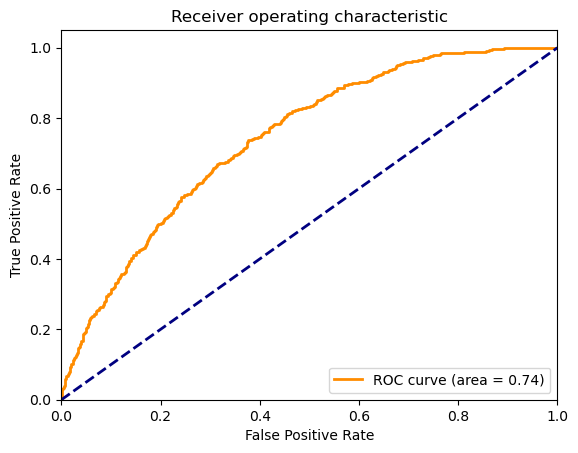

In [112]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 5s 349ms/step - loss: 2.4857 - accuracy: 0.2018
Test Loss: 2.485705852508545
Test Accuracy: 0.20183485746383667
11/11 [==============================] - 5s 377ms/step
AUC for class 0: 0.5581
AUC for class 1: 0.8089
AUC for class 2: 0.5054
AUC for class 3: 0.9339
AUC for class 4: 0.7888
AUC for class 5: 0.7471
AUC for class 6: 0.8480
AUC for class 7: 0.7765
AUC for class 8: 0.8852
AUC for class 9: 0.6512
AUC for class 10: 0.5954
AUC for class 11: 0.5956
AUC for class 12: 0.8518
AUC for class 13: 0.8526
AUC for class 14: 0.6827
AUC for class 15: 0.6660


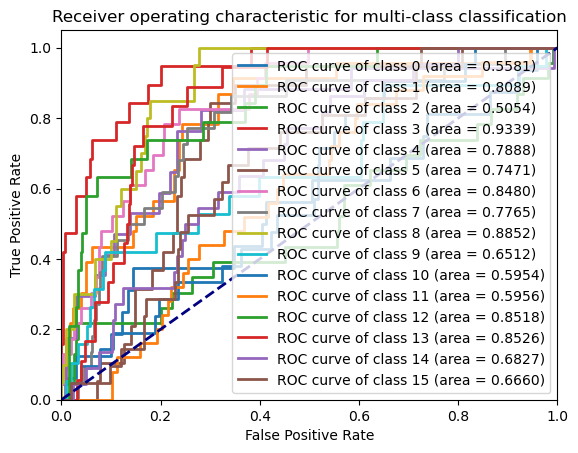

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()